# Computing the partial autocorrelation function (PACF)

In this notebook we show how we can compute the PACF and PACF plots.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Datasets" from this repo.

## Data Set Synopsis

The timeseries is collected between January 1992 and May 2016.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import pacf

sns.set_context("talk")

# Computing the PACF manually for a white noise timeseries

Let's compute the PACF  on a time series of white noise where each observation is generated by random from a normal distribution so there is no predictive information in any historic point:

$$y_t = noise_t$$ where $$noise_{t}  \sim  N(mean, std)$$

We expect the autocorrelation to be small at all lags as each data point is completely independent of each other.

In [2]:
num_timesteps = 300  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


Text(0.5, 1.0, 'white noise')

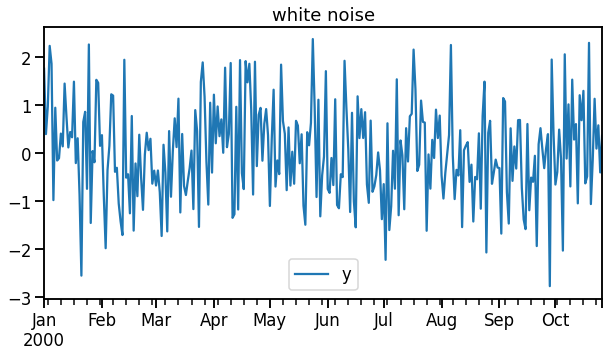

In [3]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("white noise")

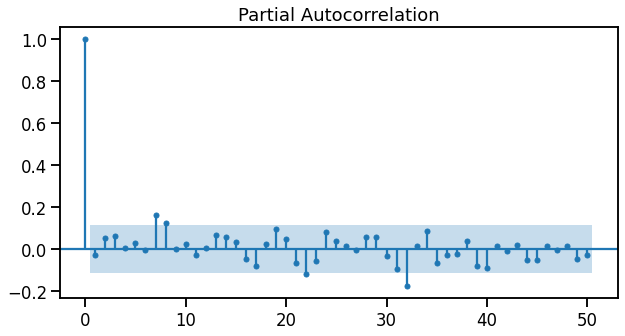

In [4]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y"],
    method="ywmle",
    lags=50,
    ax=ax,
    alpha=0.05,
);

 - The autocorrelation is one at lag 0 as expected.
 - The autocorrelation at all other lags are not signficant. As expected from white noise.


We see clearly that there is no correlation in the lag plots.

Now let's look at some timeseries with more structure and see what the PACF looks like.

# Time series with lag 1 (aka AR1 process)

We create a toy time series where there should be a correlation with the lag of the time series

$$y_t = \phi y_{{t-1}} + noise_t$$ where $$noise_{t}  \sim  N(mean, std)$$

We might think that this means there is only a correlation with lag 1 of the time series $y$ but we will see that is not the case. Also just for your information, the above is known as an AR(1) process where AR stands for autoregressive.

We can write the formula in terms of lags greater than 1 by feeding the formula back into itself. To simplify the point we're going to ignore the noise component for now: 

$$y_t = \phi y_{{t-1}} $$ 
$$y_t = \phi^2 y_{{t-2}} $$
$$y_t = \phi^3 y_{{t-3}} $$
$$...$$

This shows us that we can relate $y_t$ to lagged versions of itself for lags greater than 1. We see that data further in the past gets less weight (when $|\phi| < 1$ which is a constraint to ensure that the distant past does not get more weight than the recent past). This means that larger lags have less influence on $y_t$. We shall see this decrease in influence from lags further in the past will be reflected in the ACF.

In [5]:
# Initial parameters
num_timesteps = 1000  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time
phi = 0.9
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Generate time series
y = np.zeros(num_timesteps)
for t in range(1, num_timesteps):
    noise = np.random.normal()
    y[t] = phi * y[t - 1] + noise

df = pd.DataFrame(data={"y": y}, index=ts)

Text(0.5, 1.0, 'AR1')

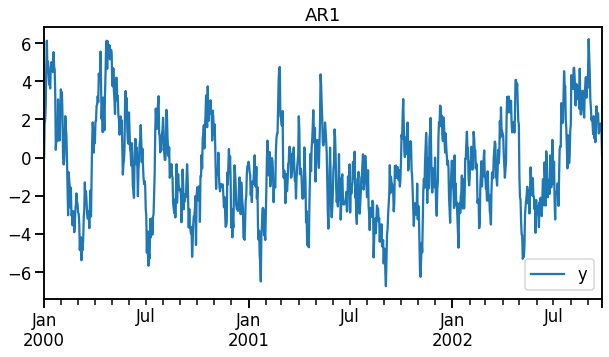

In [6]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("AR1")

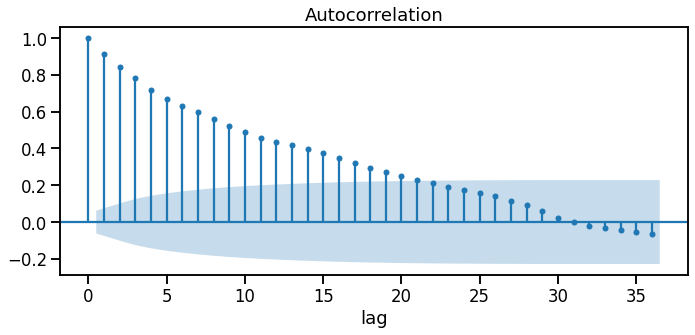

In [7]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

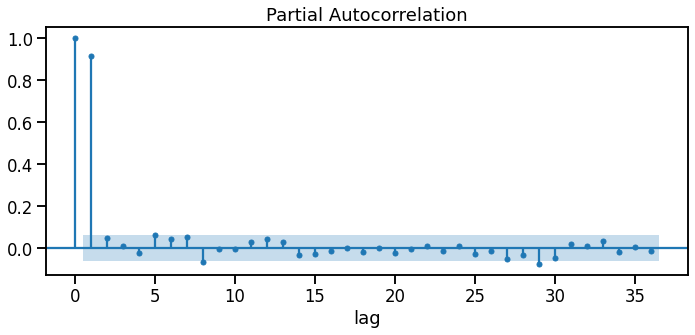

In [8]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

The PACF is large for k = 1 and not significant for k > 2 as we wanted!


# Time series with lag 1 and lag 2 (aka AR2)

Let's combine a lag of 1 and a lag of 2. This is known as an AR2 model or process.

$$y_t = \phi_1 y_{{t-1}} + \phi_2 y_{{t-2}} + noise_t$$ where $$noise_{t}  \sim  N(mean, std)$$

In [9]:
# Initial parameters
num_timesteps = 1000  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time
phi_1 = 0.1
phi_2 = 0.8
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

# Generate time series
y = np.zeros(num_timesteps)
for t in range(2, num_timesteps):
    noise = np.random.normal()
    y[t] = phi_1 * y[t - 1] + phi_2 * y[t - 2] + noise

df = pd.DataFrame(data={"y": y}, index=ts)

Text(0.5, 1.0, 'AR2')

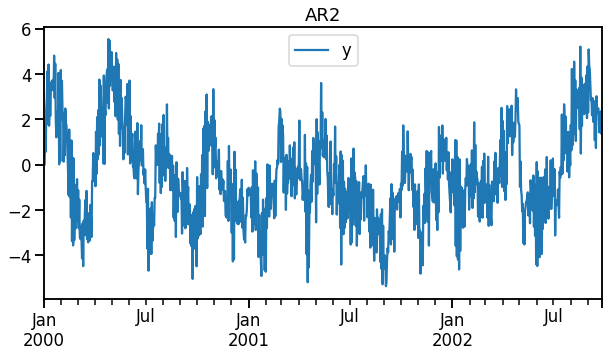

In [10]:
# Plot the time series
ax = df.plot(figsize=[10, 5])
ax.set_title("AR2")

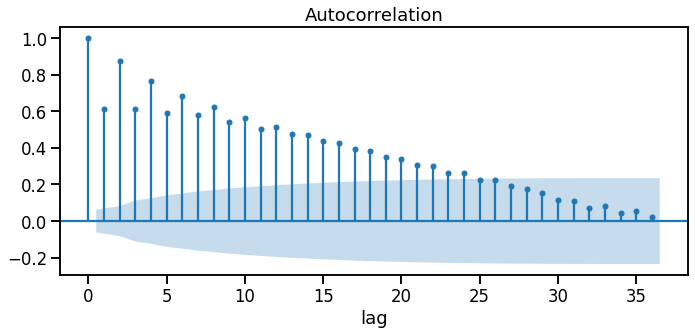

In [11]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

- The strong weight on $𝑦_{𝑡−2}$  is reflected in the oscillating peaks in the ACF at lags 2, 4, 6 etc. 
- This ACF suggests a cycle of lag 2 in the time series and hence would be a helpful feature


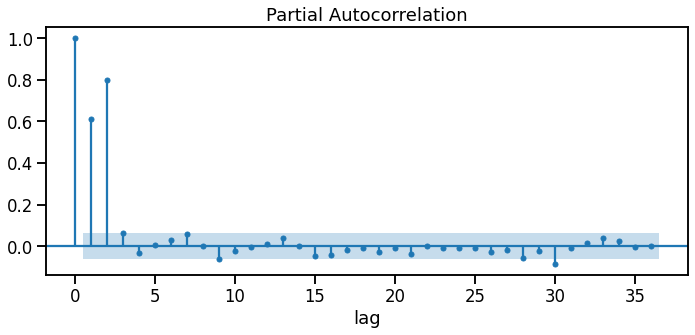

In [12]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df,
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

- The PACF has significant lags at k=1 and k=2 is zero for k>0 as we wanted! 
- The PACF is larger for k=2 as it has much greater weight in this example


# Time series with trend and seasonality

In [13]:
# Load retail sales dataset with the artificially added outliers
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

Let's plot the time series

<AxesSubplot:xlabel='ds'>

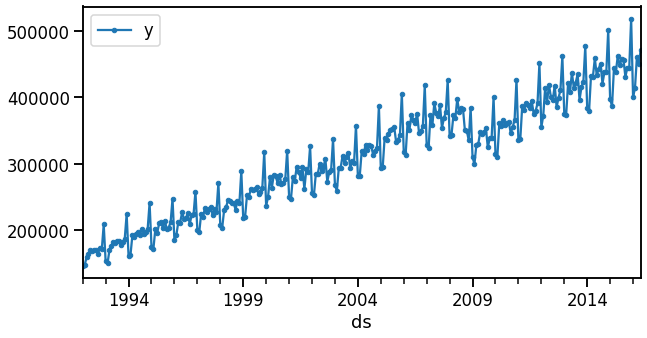

In [14]:
df.plot(y="y", marker=".", figsize=[10, 5])

Let's plot the ACF

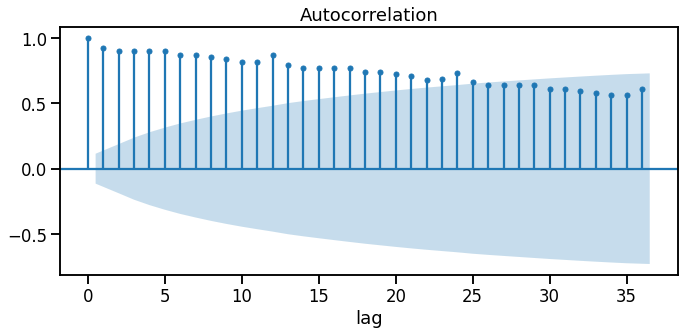

In [15]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df["y"],
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

 - The autocorrelation is one at lag 0 as expected.
 - The autocorrelation decays slowly due to the strong trend.
 - There are peaks at multiples of the seasonal lag of 12 due to the seasonality.

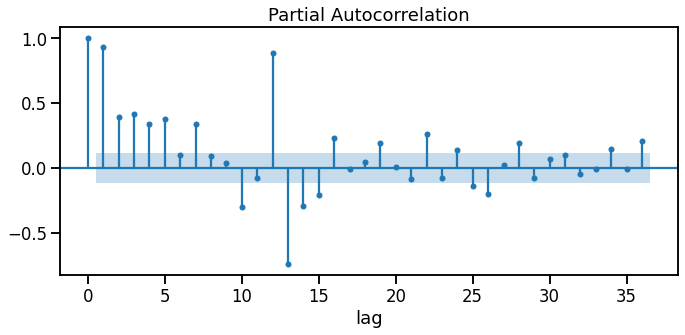

In [16]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y"],
    method="ols",
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

- The PACF assumes the time series is stationary. 
- This time series is clearly not stationary. The trend means that the mean changes in time. 
- Despite that you still see can still see a strong peak at k=12 and the smaller lags.

Let's remove the trend and re-examine the PACF.

<AxesSubplot:xlabel='ds'>

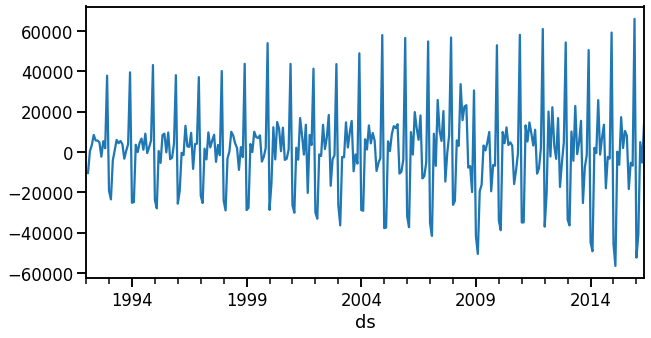

In [17]:
# Compute the trend with LOWESS
frac = 0.1
y = df["y"]
x = np.arange(0, len(y))
res = lowess(endog=y, exog=x, frac=frac)
df["lowess"] = res[:, 1]

df["y_detrend"] = df["y"] - df["lowess"]
df["y_detrend"].plot(figsize=(10, 5))

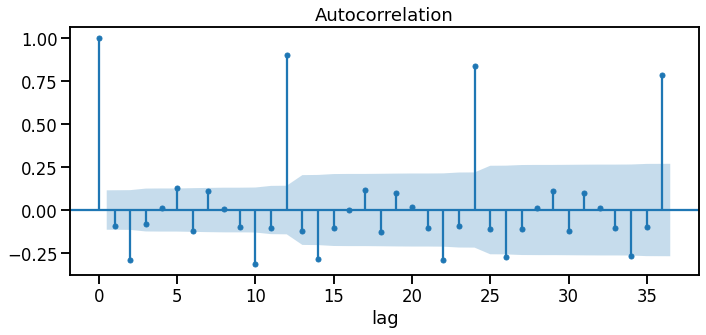

In [18]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=df["y_detrend"],
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

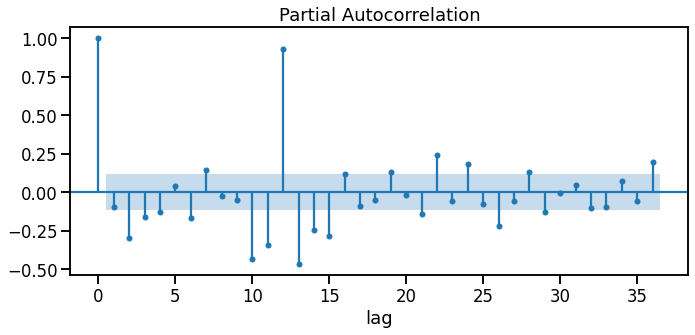

In [19]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["y_detrend"],
    method="ols",
    lags=36,
    ax=ax,
    alpha=0.05,
)
ax.set_xlabel("lag")
plt.tight_layout()

The PACF shows a strong lag at 12 but not at multiples of 12 afterwards. This means that most of the predictive information from the seasonal lag is captured at lag 12 as expected!


In summary this would suggest that we could create features using a lag of 12 (from the seasonality) and low lags like 1, 2, 3, and 4. The other larger lags such as lag 10, 11, or 13 are more difficult to intrepret. One reason for not including them is that you do not see peaks at multiples of 10, 11, or 13 in the ACF. Also from domain knowledge (this is retail sales) it is highly unlikely that lags much beyond 12 months will be relevant.